# Exoplanet Radius Prediction using Linear Regression

import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score 

Getting data from excel file using Pandas

In [2]:
import pandas as pd

data = pd.read_csv("exoplanet_radius_pred.csv")

# Print the columns available in the DataFrame
print("Columns available in the DataFrame:")
print(data.columns)

# Double-check and update column names
column_names = [' Transit_Light_Curve ', ' Radial_Velocity ', ' Stellar_Mass ', ' Stellar_Radius ', ' Planet-Planet_Occultation', ' Multiband_Photometry ', ' Asteroseismology ']

# Select the specified columns
X = data[column_names]
y = data['Exoplanet_Radius ']

# Convert to NumPy arrays if needed
X = X.values
y = y.values

print("Input features: ", X)
print("Target Features: ", y)


Columns available in the DataFrame:
Index([' Transit_Light_Curve ', ' Radial_Velocity ', ' Stellar_Mass ',
       ' Stellar_Radius ', ' Planet-Planet_Occultation',
       ' Multiband_Photometry ', ' Asteroseismology ', 'Exoplanet_Radius '],
      dtype='object')
Input features:  [[ 3.20e-02 -1.25e+01  1.20e+00 ...  1.10e-02  2.50e-01  2.00e-03]
 [ 4.50e-02  8.70e+00  1.80e+00 ...  1.80e-02  3.10e-01  1.00e-03]
 [ 2.50e-02 -5.20e+00  9.00e-01 ...  8.00e-03  2.10e-01  3.00e-03]
 ...
 [ 3.80e-02  9.20e+00  1.00e+00 ...  1.50e-02  2.70e-01  2.00e-03]
 [ 2.70e-02 -9.30e+00  1.10e+00 ...  1.10e-02  2.30e-01  3.00e-03]
 [ 3.50e-02  9.40e+00  1.00e+00 ...  1.40e-02  2.60e-01  2.00e-03]]
Target Features:  [0.14 0.18 0.09 0.12 0.11 0.16 0.07 0.1  0.13 0.15 0.08 0.14 0.1  0.09
 0.12 0.17 0.07 0.11 0.13 0.15 0.08 0.1  0.12 0.18 0.09 0.1  0.13 0.16
 0.07 0.12 0.09 0.14 0.08 0.11 0.12 0.15 0.07 0.1  0.11 0.14 0.12 0.19
 0.1  0.12 0.09 0.17 0.08 0.11 0.14 0.16 0.07 0.1  0.08 0.11 0.09 0.18
 0.07 0.09

Scaling the data

In [3]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now X_scaled contains the standardized features

print("Standardized Input features: ", X_scaled)
print("Target Features: ", y)

Standardized Input features:  [[-0.23874987 -2.26574918  0.89096894 ... -0.26899112  0.3834585
  -0.28479492]
 [ 2.19697318  1.65315687  4.51084847 ...  2.32552209  2.32394955
  -1.53472816]
 [-1.55029306 -0.91631455 -0.91897082 ... -1.38092536 -0.9102022
   0.96513833]
 ...
 [ 0.88543     1.7455839  -0.31565757 ...  1.21358786  1.03028885
  -0.28479492]
 [-1.17556643 -1.67421619  0.28765569 ... -0.26899112 -0.26337185
   0.96513833]
 [ 0.32334006  1.78255471 -0.31565757 ...  0.84294311  0.70687367
  -0.28479492]]
Target Features:  [0.14 0.18 0.09 0.12 0.11 0.16 0.07 0.1  0.13 0.15 0.08 0.14 0.1  0.09
 0.12 0.17 0.07 0.11 0.13 0.15 0.08 0.1  0.12 0.18 0.09 0.1  0.13 0.16
 0.07 0.12 0.09 0.14 0.08 0.11 0.12 0.15 0.07 0.1  0.11 0.14 0.12 0.19
 0.1  0.12 0.09 0.17 0.08 0.11 0.14 0.16 0.07 0.1  0.08 0.11 0.09 0.18
 0.07 0.09 0.12 0.15 0.08 0.13 0.1  0.12 0.08 0.11 0.13 0.16 0.09 0.1
 0.12 0.17 0.08 0.09 0.11 0.15 0.08 0.11 0.12 0.14 0.08 0.11 0.1  0.13
 0.09 0.16 0.07 0.09 0.12 0.18 0.08 0

In [4]:
print ('The shape of input is:', X.shape)
print ('The shape of target variable is: ', y.shape)
print ('Number of training examples (m):', len(X))

The shape of input is: (237, 7)
The shape of target variable is:  (237,)
Number of training examples (m): 237


Visualize the data

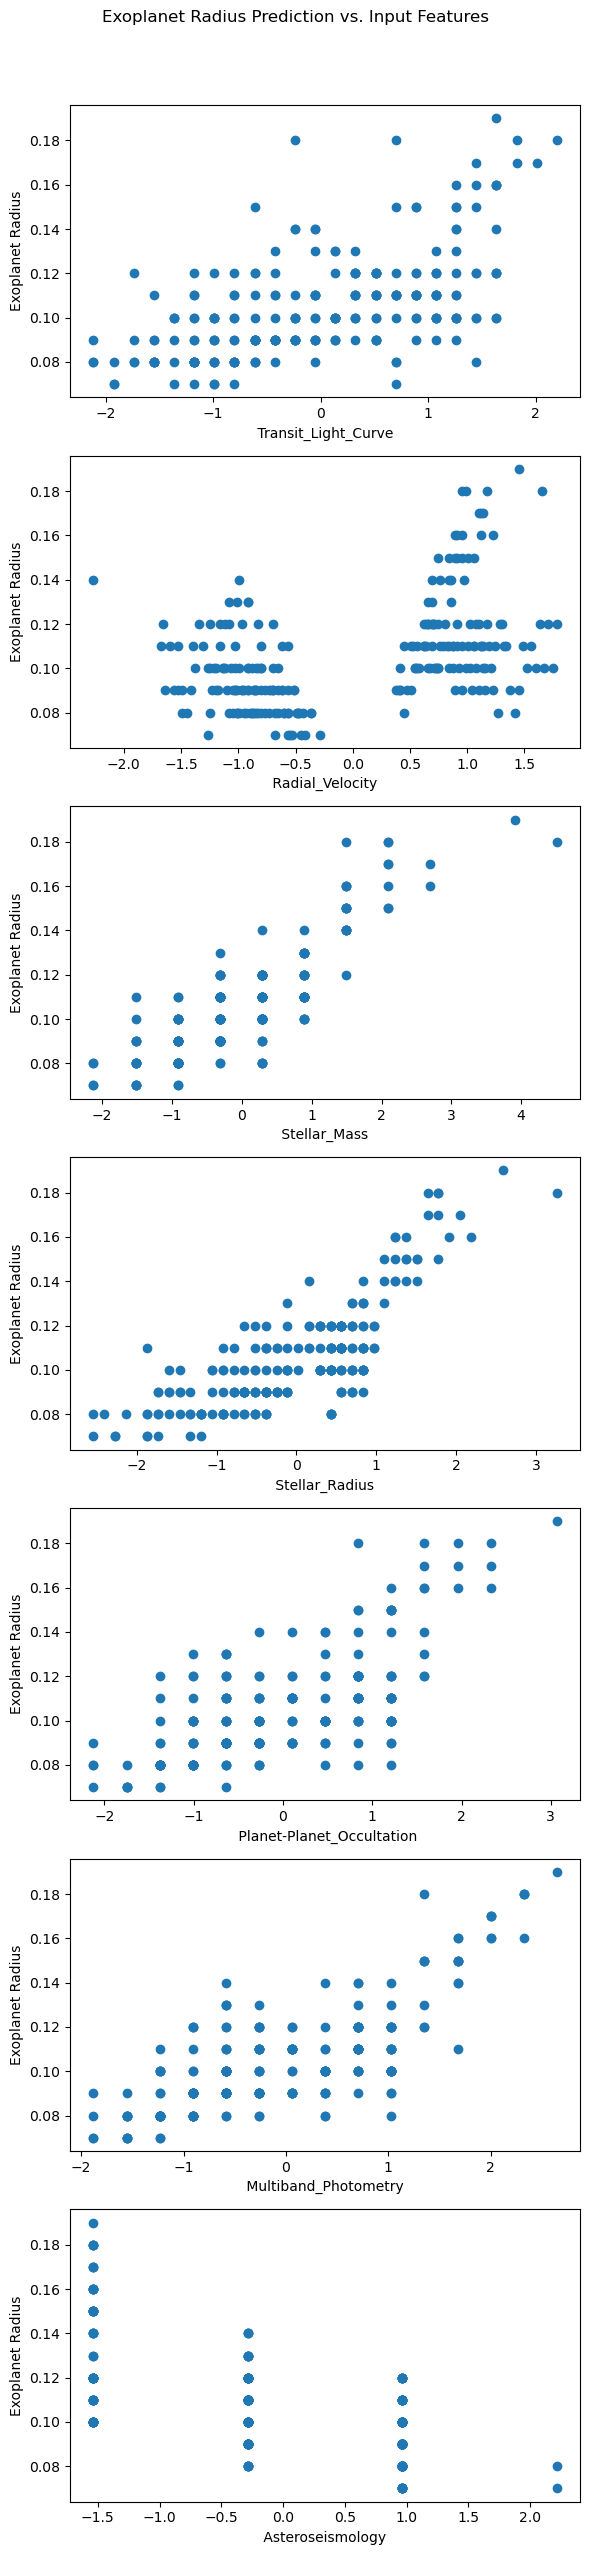

In [5]:
# Create subplots
fig, axs = plt.subplots(7, 1, figsize=(6, 25))
fig.suptitle('Exoplanet Radius Prediction vs. Input Features', y=1.02)

# Plot each input feature against the target variable (Exoplanet Radius)
for i in range(7):
    axs[i].scatter(X_scaled[:, i], y)
    axs[i].set_xlabel(column_names[i])
    axs[i].set_ylabel('Exoplanet Radius')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Show the plot
plt.show()

Training the model

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the trained parameters
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 0.0001081641902359605
Coefficients: [-1.69894529e-01 -9.28205140e-04  8.57011337e-02 -8.66217719e-03
  3.18779744e-02  2.83469107e-01 -6.32672363e+00]
Intercept: -0.02485217528262816


visualizing the data

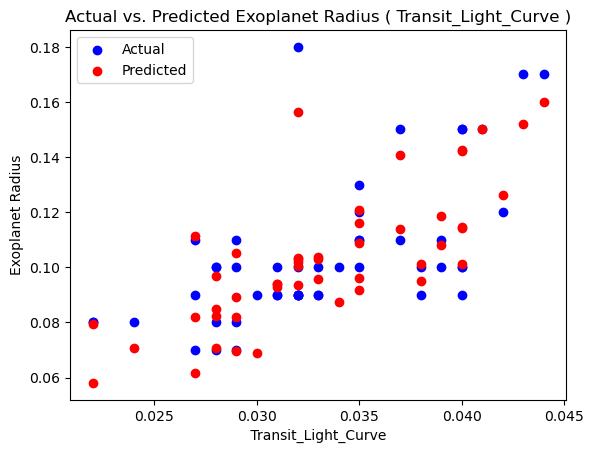

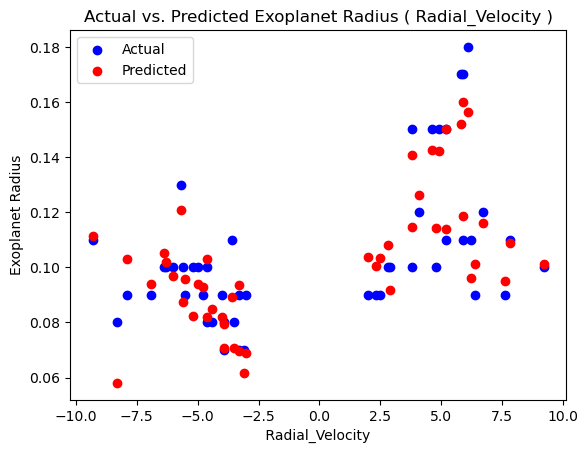

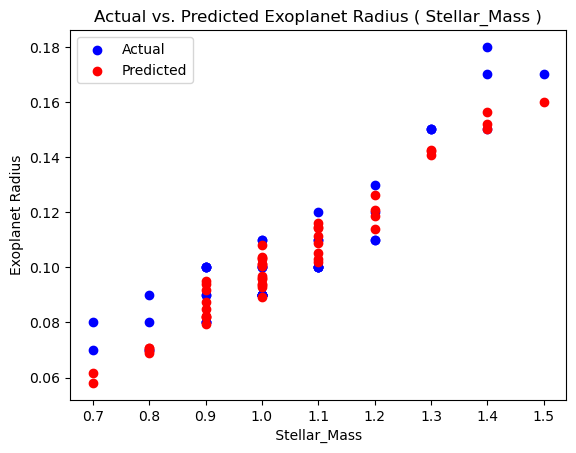

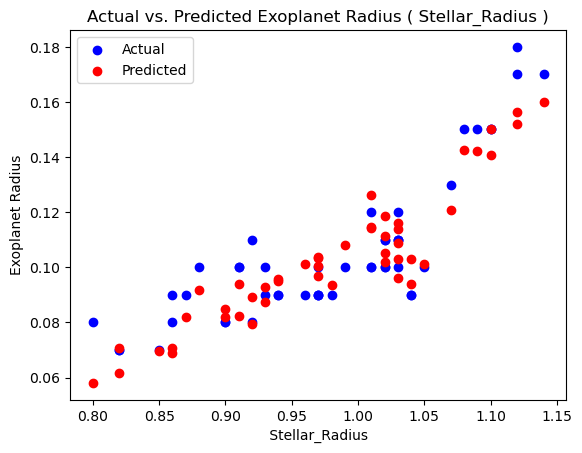

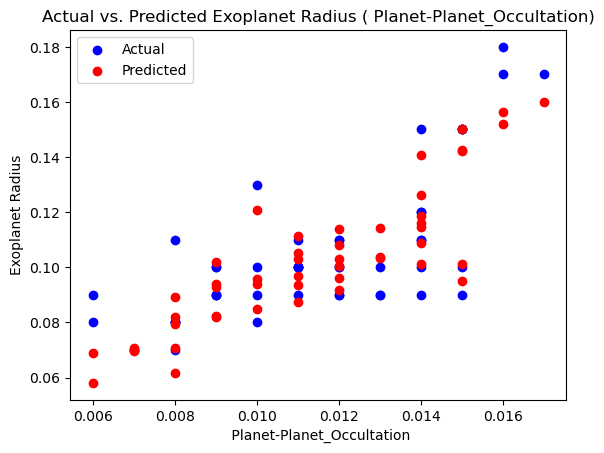

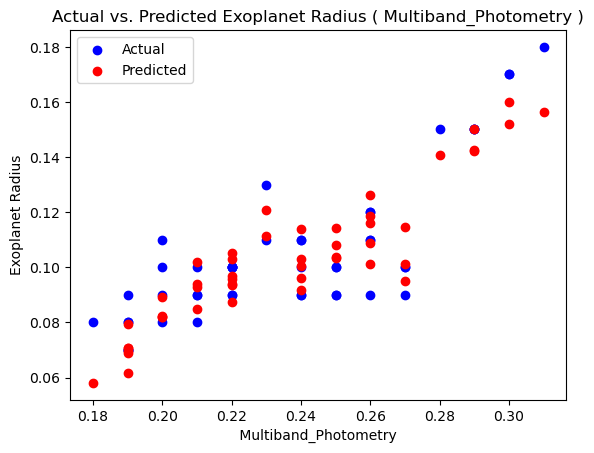

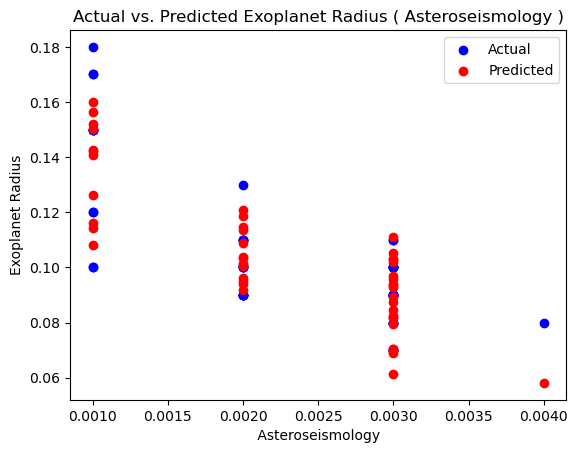

In [7]:
# Visualize predicted vs. actual values with different colors
for i in range(X_test.shape[1]):
    plt.figure()
    plt.scatter(X_test[:, i], y_test, color='blue', label='Actual')
    plt.scatter(X_test[:, i], y_pred, color='red', label='Predicted')
    plt.xlabel(column_names[i])
    plt.ylabel('Exoplanet Radius')
    plt.title(f'Actual vs. Predicted Exoplanet Radius ({column_names[i]})')
    plt.legend()
    plt.show()

Getting the accuracy of model

In [8]:
sample_input = X_test[0]

# Make a prediction on the sample input
predicted_radius = model.predict([sample_input])

# Print the prediction in the desired format
print(f"Predicted radius is {predicted_radius[0]:.2f} Earth radius times.")

# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
# Format accuracy as a percentage
accuracy_percentage = r2 * 100

# Print the accuracy of the model
print(f"Model Accuracy: {accuracy_percentage:.2f}%")

Predicted radius is 0.10 Earth radius times.
Model Accuracy: 84.36%
